<a href="https://colab.research.google.com/github/SowmyaLR/Statistics-for-ML/blob/pandemic-visualization/india/gujarat/gujarat_covid_19_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read live covid-19 data of India from the official website


---


1. Read the official website from [Covid-19 India](https://www.mohfw.gov.in/)
2. Get statewise data using pd.read_html()

In [0]:
url = 'https://www.mohfw.gov.in/'
state_wise_df = pd.read_html(url)
state_wise_df = state_wise_df[0][:33]

1. Understand the datatype of each columns in the dataset
2. use df.info() for this

In [20]:
state_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   S. No.                      33 non-null     object
 1   Name of State / UT          33 non-null     object
 2   Active Cases*               33 non-null     object
 3   Cured/Discharged/Migrated*  33 non-null     object
 4   Deaths**                    33 non-null     object
 5   Total Confirmed cases*      33 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


1. Need to convert columns "Total Confirmed cases*" , "Cured/Discharged/Migrated", "Deaths**" to int dtype for further computation

In [0]:
state_wise_df['Total Confirmed cases*'] = pd.to_numeric(state_wise_df['Total Confirmed cases*'])
state_wise_df['Cured/Discharged/Migrated*'] = pd.to_numeric(state_wise_df['Cured/Discharged/Migrated*'])
state_wise_df['Deaths**'] = pd.to_numeric(state_wise_df['Deaths**'])



> Now the required columns are converted to int64



In [22]:
state_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   S. No.                      33 non-null     object
 1   Name of State / UT          33 non-null     object
 2   Active Cases*               33 non-null     object
 3   Cured/Discharged/Migrated*  33 non-null     int64 
 4   Deaths**                    33 non-null     int64 
 5   Total Confirmed cases*      33 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.7+ KB




> Now sort the dataframe to know which states have highest case



In [23]:
state_wise_df.sort_values(by='Total Confirmed cases*', ascending=False, inplace=True)
state_wise_df.head()

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
20,21,Maharashtra,46086,44517,3438,94041
30,31,Tamil Nadu,17182,19333,326,36841
9,10,Delhi,19581,12245,984,32810
11,12,Gujarat,5439,14735,1347,21521
28,29,Rajasthan,2772,8569,259,11600


Top 5 states having high Covid-19 cases are as follows

1. Maharashtra
2. Tamil Nadu
3. Gujarat
4. Delhi
5. Rajasthan

In [24]:
state_wise_df.columns


Index(['S. No.', 'Name of State / UT', 'Active Cases*',
       'Cured/Discharged/Migrated*', 'Deaths**', 'Total Confirmed cases*'],
      dtype='object')

Text(0.5, 1.0, 'Statewise Covid-19 report')

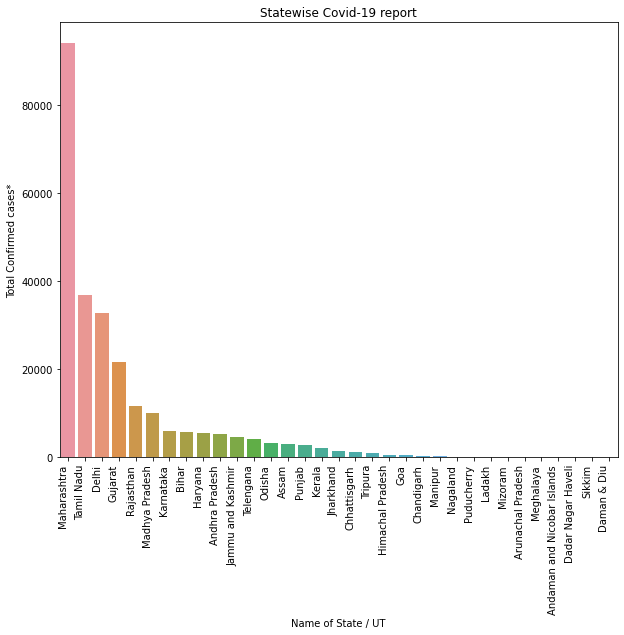

In [25]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Name of State / UT', y='Total Confirmed cases*', data=state_wise_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Statewise Covid-19 report')

# Gujarat Covid-19 Analysis


---


1. dataset source: [kaggle](https://www.kaggle.com/pateldeep7799/covid19-cases-in-gujaratindia?select=DistrictWiseReport.csv)

2. Download it as follows

In [26]:
!wget -O 'gujarat_dataset.csv' https://raw.githubusercontent.com/SowmyaLR/Statistics-for-ML/pandemic-visualization/india/gujarat/gujarat_dataset.csv

--2020-06-11 04:26:56--  https://raw.githubusercontent.com/SowmyaLR/Statistics-for-ML/pandemic-visualization/india/gujarat/gujarat_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1121 (1.1K) [text/plain]
Saving to: ‘gujarat_dataset.csv’

gujarat_dataset.csv 100%[===================>]   1.09K  --.-KB/s    in 0s      

2020-06-11 04:26:56 (43.3 MB/s) - ‘gujarat_dataset.csv’ saved [1121/1121]



Read the gujarat covid data

In [0]:
gujarat_covid_df = pd.read_csv('gujarat_dataset.csv')

Check the statistical info about the data

In [28]:
gujarat_covid_df.describe()

,Sr No,Confirmed Positive Cases,Cases Tested for COVID19,Patients Recovered,People Under Quarantine,Total Deaths
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,17.00000,290.636364,3779.030303,113.727273,7359.575758,17.757576
std,9.66954,1203.782627,9412.489753,399.442054,10138.993216,80.808427
min,1.00000,1.000000,344.000000,0.000000,19.000000,0.000000
25%,9.00000,8.000000,760.000000,3.000000,1777.000000,0.000000
50%,17.00000,32.000000,1291.000000,14.000000,3903.000000,1.000000
75%,25.00000,73.000000,1731.000000,37.000000,7335.000000,2.000000
max,33.00000,6910.000000,51232.000000,2247.000000,44187.000000,465.000000


In [29]:
gujarat_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sr No                     33 non-null     int64 
 1   District Name             33 non-null     object
 2   Confirmed Positive Cases  33 non-null     int64 
 3   Cases Tested for COVID19  33 non-null     int64 
 4   Patients Recovered        33 non-null     int64 
 5   People Under Quarantine   33 non-null     int64 
 6   Total Deaths              33 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.9+ KB




> Now sort the dataframe districtwise having high confirmed cases



In [0]:
sorted_gujarat_covid_df = gujarat_covid_df.sort_values(by='Confirmed Positive Cases',ascending=False).nlargest(5,'Confirmed Positive Cases')

Visualize the top 5 districts in Gujarat having high confirmed case.

The top 5 districts are

1. Ahmedabad
2. Surat
3. Vadodara
4. Gandhinagar
5. Bhavnanagar

Text(0.5, 1.0, 'Top 5 cities in Gujarat having positive cases')

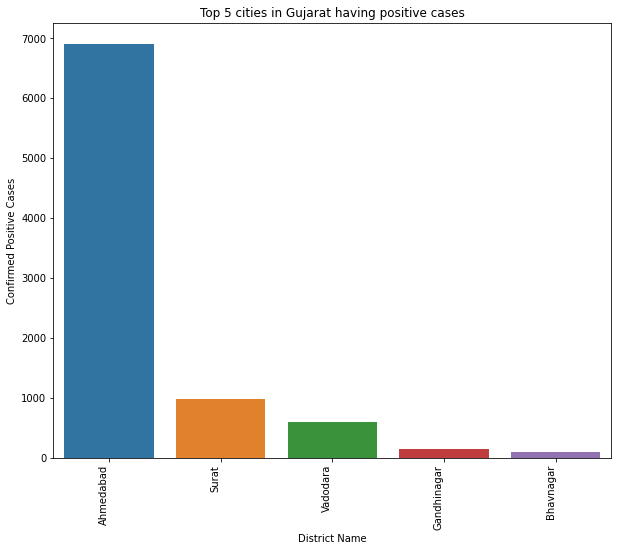

In [31]:
plt.subplots(figsize=(10,8))
ax = sns.barplot(x='District Name', y='Confirmed Positive Cases', data=sorted_gujarat_covid_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Top 5 cities in Gujarat having positive cases')

# Analysis about density per km^2 of Gujarat


---

Lets look at the Area and density of population in Gujarat by checking the wikipedia link

In [0]:
pouplation_url = 'https://en.wikipedia.org/wiki/List_of_cities_in_Gujarat_by_population'
gujarat_population_df = pd.read_html(pouplation_url)
gujarat_population_df = gujarat_population_df[0]

In [33]:
gujarat_population_df.describe()

,S.No.,Population (2021) Expected,Population (2019),Population (2011),Population (2001),Population (1991),Area (2019) (km2)
count,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,15.000000
mean,8.000000,1.925498e+06,1.673766e+06,1.178556e+06,8.485485e+05,5.861981e+05,129.110667
std,4.472136,3.265199e+06,2.721841e+06,1.837109e+06,1.246850e+06,8.599641e+05,145.730343
min,1.000000,2.435840e+05,2.371380e+05,2.172030e+05,1.516930e+05,1.045850e+05,27.600000
25%,4.500000,3.372465e+05,3.168285e+05,2.499255e+05,1.970875e+05,1.635685e+05,41.270000
50%,8.000000,3.852910e+05,3.614170e+05,2.880920e+05,2.324110e+05,1.744800e+05,60.360000
75%,11.500000,1.636700e+06,1.400860e+06,9.982610e+05,7.799855e+05,5.298575e+05,156.355000
max,15.000000,1.145000e+07,9.250000e+06,6.357693e+06,4.525013e+06,3.312216e+06,493.290000


In [34]:
gujarat_population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No.                       15 non-null     float64
 1   City Name                   15 non-null     object 
 2   Population (2021) Expected  15 non-null     int64  
 3   Population (2019)           15 non-null     int64  
 4   Population (2011)           15 non-null     int64  
 5   Population (2001)           15 non-null     int64  
 6   Population (1991)           15 non-null     int64  
 7   Area (2019) (km2)           15 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ KB


Calculate the density per km^2 of Gujarat by the following calculation

In [0]:
gujarat_population_df['density_per_km2_2019'] = gujarat_population_df['Population (2019)']/gujarat_population_df['Area (2019) (km2)']

Sort the above dataframe having highest density_per_km^2

In [36]:
sorted_population_df = gujarat_population_df.sort_values(by='density_per_km2_2019', ascending=False).nlargest(5,'density_per_km2_2019')
sorted_population_df

,S.No.,City Name,Population (2021) Expected,Population (2019),Population (2011),Population (2001),Population (1991),Area (2019) (km2),density_per_km2_2019
0,1.0,Ahmedabad,11450000,9250000,6357693,4525013,3312216,493.29,18751.647104
1,2.0,Surat,7567538,6850000,4591246,2811614,1518950,379.77,18037.233062
8,9.0,Navsari,350674,333777,282791,232411,190946,30.25,11033.950413
4,5.0,Bhavnagar,816845,771719,605882,517708,405225,71.36,10814.447870
12,13.0,Surendranagar,298692,287093,253606,219585,166466,27.60,10401.920290


Again the same two districts topped here

1. Ahmedabad
2. Surat

Text(0.5, 1.0, "Gujarat's population density per km2 as of 2019")

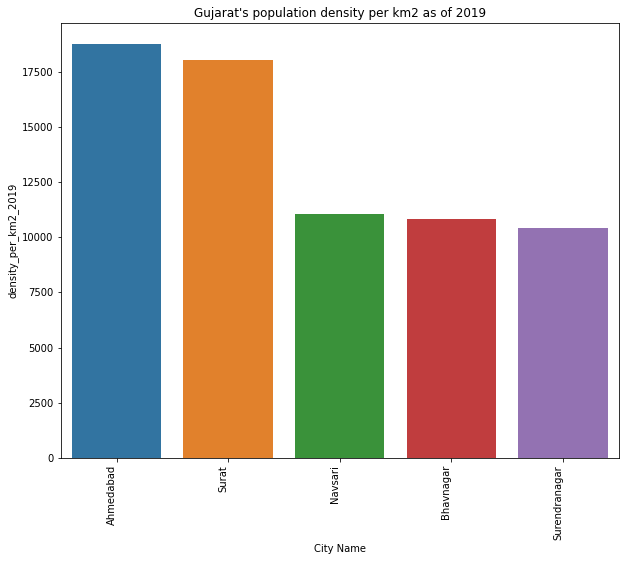

In [37]:
plt.subplots(figsize=(10,8))
ax1 = sns.barplot(x='City Name', y='density_per_km2_2019', data=sorted_population_df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax1.set_title("Gujarat's population density per km2 as of 2019")

# Insights observed from the above analysis

Many factors are indicators for Covid-19 spread. Here **density per km ^2** is also identified as one of the indicators. 

Some additional precautions can be taken in densely populated place